#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03D Distributions of body height and income**

height-income-distributions  dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/height-income-distributions/clean/"
data_out = dirname + "da_case_studies/ch03-distributions-height-income/"
output = dirname + "da_case_studies/ch03-distributions-height-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
from py_helper_functions import *


##### load in clean and tidy data and create workfile

In [4]:
hrs = pd.read_csv(data_in + "hrs_height_income.csv")


In [5]:
hrs["height"] = hrs["height"].apply(pd.to_numeric, errors="coerce")


In [6]:
filtered_women = hrs.loc[
    lambda x: (x["age"] >= 55)
    & (x["age"] < 60)
    & (x["female"] == 1)
    & (x["height"] > 1.3)
    & (x["height"] < 2.1)
]


In [7]:
hrs.height.describe()


count    18660.000000
mean         1.677539
std          0.104078
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.324100
Name: height, dtype: float64

##### graph --height

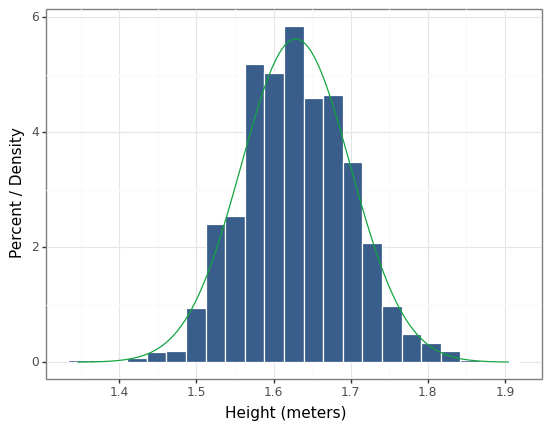

<ggplot: (400254205)>

In [8]:
(
    ggplot(filtered_women, aes(x="height"))
    + geom_histogram(
        aes(y="stat(density)"),
        bins=23,
        fill=color[0],
        color="white",
        alpha=0.8,
        center=1.55,
        closed="right",
    )
    + stat_function(
        fun=norm.pdf,
        colour=color[1],
        args=[np.mean(filtered_women["height"]), np.std(filtered_women["height"])],
    )
    + theme_bw()
    + ylab("Percent / Density")
    + xlab("Height (meters)")
)


##### LOGNORMAL: family income of women age 55-59 

#### income variable

In [9]:
# filter dataset
filtered_women_income = hrs.loc[
    lambda x: (x["age"] >= 55)
    & (x["age"] < 60)
    & (x["female"] == 1)
    & (x["hhincome"] > 1)
    & (x["hhincome"] < 1000)
]


In [10]:
filtered_women_income["hhincome"].describe()


count    1918.000000
mean       74.931920
std        87.185212
min         1.200000
25%        19.704000
50%        48.000000
75%       100.800000
max       945.000000
Name: hhincome, dtype: float64

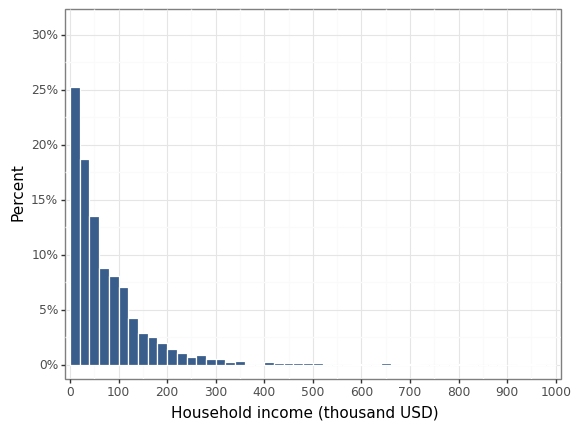

<ggplot: (400383657)>

In [11]:
(
    ggplot(filtered_women_income, aes(x="hhincome"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        binwidth=20,
        boundary=0,
        fill=color[0],
        color="white",
        alpha=0.8,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Household income (thousand USD)")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 1001), breaks=seq(0, 1001, by=100)
    )
    + scale_y_continuous(
        expand=(0.01, 0.01),
        limits=(0, 0.31),
        breaks=seq(0, 0.31, by=0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


In [12]:
# ln income
filtered_women_income["lnincome"] = np.log(filtered_women_income["hhincome"])


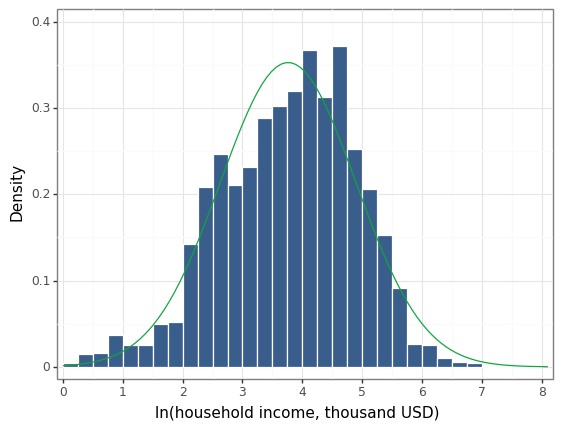

<ggplot: (400446416)>

In [13]:
(
    ggplot(filtered_women_income, aes(x="lnincome"))
    + geom_histogram(
        aes(y="stat(density)"),
        binwidth=0.25,
        fill=color[0],
        color="white",
        boundary=4,
        closed="right",
    )
    + stat_function(
        fun=norm.pdf,
        colour=color[1],
        args=[
            np.mean(filtered_women_income["lnincome"]),
            np.std(filtered_women_income["lnincome"]),
        ],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 8.1), breaks=seq(0, 8.1, by=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 0.4), breaks=seq(0, 0.41, by=0.1)
    )
    + ylab("Density")
    + xlab("ln(household income, thousand USD)")
    + theme_bw()
)
